# Police Arrest Analysis

## Import Depenencies

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [145]:
# loading dataset

police_arrest = pd.read_excel(r"C:\Users\HP\Desktop\Techrative Technology Limited\Techrative Technology Limited\New Police Arrest.xlsx")
police_arrest.head()

,ID Reference Number,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Event Date/Time
0,1,Asian,Male,43,NON-HISPANIC,6.0,0,TOD,FSB,2021-01-01 01:07:00
1,2,Black/African American,Male,23,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00
2,3,Black/African American,Male,18,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00
3,4,Black/African American,Male,21,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00
4,5,White,Female,38,HISPANIC,4.0,0,TOD,FSB,2021-01-01 03:00:00


## Data Attributes

In [146]:
print("No of Rows:", p_arrest.shape[0])
print("No of Columns:", p_arrest.shape[1])

No of Rows: 23510
No of Columns: 10


In [147]:
police_arrest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23510 entries, 0 to 23509
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID Reference Number     23510 non-null  int64  
 1   Subject's race          23510 non-null  object 
 2   Subject's gender        23510 non-null  object 
 3   Subject's age           23510 non-null  int64  
 4   Ethnicity               23510 non-null  object 
 5   District of occurrence  23408 non-null  float64
 6   Adjacent to School      23510 non-null  int64  
 7   Assigned Division       23381 non-null  object 
 8   Assigned Bureau         18851 non-null  object 
 9   Event Date/Time         23510 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.8+ MB


In [148]:
police_arrest.describe()

,ID Reference Number,Subject's age,District of occurrence,Adjacent to School
count,23510.00000,23510.000000,23408.000000,23510.000000
mean,11755.50000,31.813143,3.989192,0.085155
std,6786.89675,12.946909,1.748587,0.279119
min,1.00000,1.000000,1.000000,0.000000
25%,5878.25000,22.000000,3.000000,0.000000
50%,11755.50000,30.000000,4.000000,0.000000
75%,17632.75000,39.000000,5.000000,0.000000
max,23510.00000,99.000000,8.000000,1.000000


In [149]:
police_arrest.dtypes


ID Reference Number         int64
Subject's race             object
Subject's gender           object
Subject's age               int64
Ethnicity                  object
District of occurrence    float64
Adjacent to School          int64
Assigned Division          object
Assigned Bureau            object
Event Date/Time            object
dtype: object

## Data Cleaning and Data Manipulation

In [150]:
police_arrest.isnull().sum()

ID Reference Number          0
Subject's race               0
Subject's gender             0
Subject's age                0
Ethnicity                    0
District of occurrence     102
Adjacent to School           0
Assigned Division          129
Assigned Bureau           4659
Event Date/Time              0
dtype: int64

In [151]:
police_arrest.columns

Index(['ID Reference Number ', 'Subject's race', 'Subject's gender',
       'Subject's age', 'Ethnicity', 'District of occurrence',
       'Adjacent to School', 'Assigned Division', 'Assigned Bureau',
       'Event Date/Time'],
      dtype='object')

In [152]:
# Column Renaming

p_arrest =police_arrest.rename (columns = {'ID Reference Number':'Arrest_ID', 
                                            "Subject's race":'Race',
                                            "Subject's gender":'Gender',
                                          "Subject's age":'Age',
                                          'District of occurrence':'District_of_occurrence',
                                           'Adjacent to School':'Adjacent_to_school',
                                           'Assigned Division':'Assigned_Division',
                                           'Assigned Bureau':'Assigned_Bureau',
                                           'Event Date/Time':'Event_Time'})  


In [153]:
p_arrest.head(4)

,ID Reference Number,Race,Gender,Age,Ethnicity,District_of_occurrence,Adjacent_to_school,Assigned_Division,Assigned_Bureau,Event_Time
0,1,Asian,Male,43,NON-HISPANIC,6.0,0,TOD,FSB,2021-01-01 01:07:00
1,2,Black/African American,Male,23,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00
2,3,Black/African American,Male,18,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00
3,4,Black/African American,Male,21,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00


In [154]:
# Extracting month from date

p_arrest['Event_Time'] = pd.to_datetime(p_arrest['Event_Time'])

In [155]:
p_arrest['Month'] = p_arrest['Event_Time'].dt.strftime('%B')
p_arrest.head(4)

,ID Reference Number,Race,Gender,Age,Ethnicity,District_of_occurrence,Adjacent_to_school,Assigned_Division,Assigned_Bureau,Event_Time,Month
0,1,Asian,Male,43,NON-HISPANIC,6.0,0,TOD,FSB,2021-01-01 01:07:00,January
1,2,Black/African American,Male,23,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00,January
2,3,Black/African American,Male,18,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00,January
3,4,Black/African American,Male,21,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00,January


In [156]:
p_arrest['Year'] = p_arrest['Event_Time'].dt.strftime('%B')
p_arrest.head(4)

,ID Reference Number,Race,Gender,Age,Ethnicity,District_of_occurrence,Adjacent_to_school,Assigned_Division,Assigned_Bureau,Event_Time,Month,Year
0,1,Asian,Male,43,NON-HISPANIC,6.0,0,TOD,FSB,2021-01-01 01:07:00,January,January
1,2,Black/African American,Male,23,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00,January,January
2,3,Black/African American,Male,18,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00,January,January
3,4,Black/African American,Male,21,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00,January,January


In [157]:
# Extracting year from date

p_arrest['Year'] = p_arrest['Event_Time'].apply(lambda x:x.year)
p_arrest.head(4)

,ID Reference Number,Race,Gender,Age,Ethnicity,District_of_occurrence,Adjacent_to_school,Assigned_Division,Assigned_Bureau,Event_Time,Month,Year
0,1,Asian,Male,43,NON-HISPANIC,6.0,0,TOD,FSB,2021-01-01 01:07:00,January,2021
1,2,Black/African American,Male,23,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00,January,2021
2,3,Black/African American,Male,18,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00,January,2021
3,4,Black/African American,Male,21,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00,January,2021


In [158]:
# Extracting time 

p_arrest['time'] =  p_arrest['Event_Time'].dt.strftime('%H:%M:%S')

p_arrest.head(4)

,ID Reference Number,Race,Gender,Age,Ethnicity,District_of_occurrence,Adjacent_to_school,Assigned_Division,Assigned_Bureau,Event_Time,Month,Year,time
0,1,Asian,Male,43,NON-HISPANIC,6.0,0,TOD,FSB,2021-01-01 01:07:00,January,2021,01:07:00
1,2,Black/African American,Male,23,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00,January,2021,00:52:00
2,3,Black/African American,Male,18,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00,January,2021,00:52:00
3,4,Black/African American,Male,21,NON-HISPANIC,1.0,0,RCPD,NaN,2021-01-01 00:52:00,January,2021,00:52:00


In [159]:
# Filling the missing values

p_arrest['District_of_occurrence'] = p_arrest['District_of_occurrence'].fillna(p_arrest['District_of_occurrence'].mean())


In [160]:
p_arrest['Assigned_Division'] = p_arrest['Assigned_Division'].fillna(p_arrest['Assigned_Division'].mode()[0])

In [161]:
p_arrest['Assigned_Bureau'] = p_arrest['Assigned_Bureau'] . fillna(p_arrest['Assigned_Bureau'].mode()[0])

In [162]:
p_arrest.isnull().sum()

ID Reference Number       0
Race                      0
Gender                    0
Age                       0
Ethnicity                 0
District_of_occurrence    0
Adjacent_to_school        0
Assigned_Division         0
Assigned_Bureau           0
Event_Time                0
Month                     0
Year                      0
time                      0
dtype: int64

In [163]:
p_arrest['Adjacent_to_school'] = p_arrest['Adjacent_to_school'].replace({1:'Near', 0:'far'})

p_arrest.head(5)

,ID Reference Number,Race,Gender,Age,Ethnicity,District_of_occurrence,Adjacent_to_school,Assigned_Division,Assigned_Bureau,Event_Time,Month,Year,time
0,1,Asian,Male,43,NON-HISPANIC,6.0,far,TOD,FSB,2021-01-01 01:07:00,January,2021,01:07:00
1,2,Black/African American,Male,23,NON-HISPANIC,1.0,far,RCPD,PSB,2021-01-01 00:52:00,January,2021,00:52:00
2,3,Black/African American,Male,18,NON-HISPANIC,1.0,far,RCPD,PSB,2021-01-01 00:52:00,January,2021,00:52:00
3,4,Black/African American,Male,21,NON-HISPANIC,1.0,far,RCPD,PSB,2021-01-01 00:52:00,January,2021,00:52:00
4,5,White,Female,38,HISPANIC,4.0,far,TOD,FSB,2021-01-01 03:00:00,January,2021,03:00:00


## Explorative Data Analysis

### Question 1 - Total number of suspects

In [164]:
 total_num_suspects = p_arrest['Gender'].count()

print(total_num_suspects)


23510


### Question 2 - Gender with the highest arrests

In [165]:
highest_gender = p_arrest['Gender'].value_counts()

highest_gender

Gender
Male      18567
Female     4943
Name: count, dtype: int64

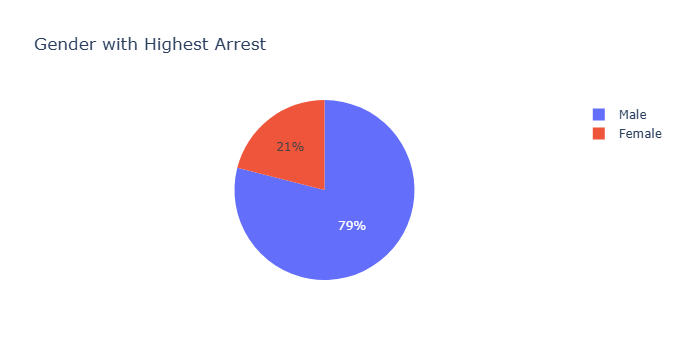

In [203]:
fig = px.pie(p_arrest, names='Gender', title ='Gender with Highest Arrest')

fig.show()

### Question 3: Age with the highest arrests

In [167]:
highest_age = p_arrest['Age'].value_counts().idxmax()

highest_age

np.int64(18)

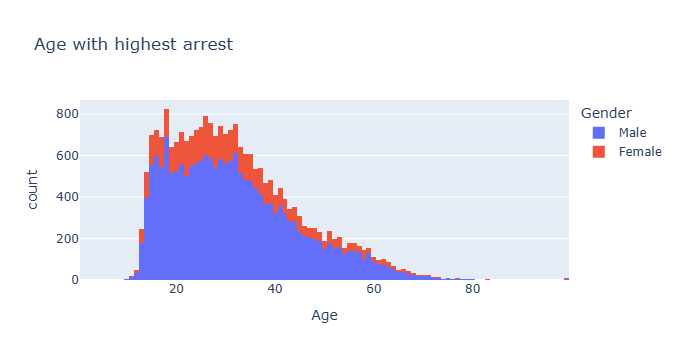

In [168]:
fig = px.histogram(p_arrest, x='Age', color = 'Gender', title ='Age with highest arrest')

fig.show()

### Question 4: Ethnicity with the highest arrests

In [169]:
highest_ethnicity = p_arrest['Ethnicity'].value_counts()

highest_ethnicity

Ethnicity
NON-HISPANIC    16358
HISPANIC         7152
Name: count, dtype: int64

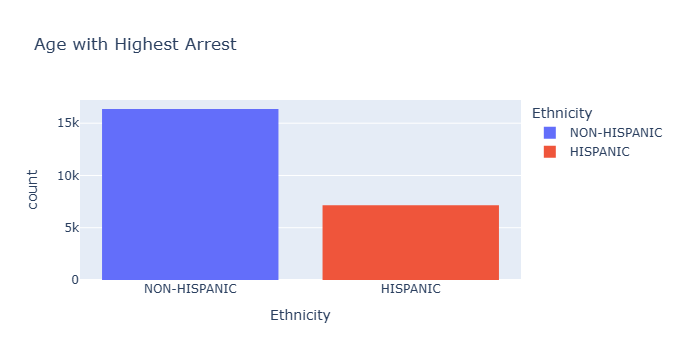

In [178]:
fig = px.histogram(p_arrest, x='Ethnicity', color = 'Ethnicity', title ='Age with Highest Arrest')

fig.show()

### Question 5: What time shows the highest arrests?

In [194]:
 # Group by Event time and count arrests
time_counts = p_arrest['time'].value_counts().reset_index()
time_counts.columns = ['time', 'Count']

# Find the time with the highest count
max_time = time_counts.loc[time_counts['Count'].idxmax(), 'time']
print(f"Time with the highest arrests: {max_time}")


Time with the highest arrests: 00:00:00


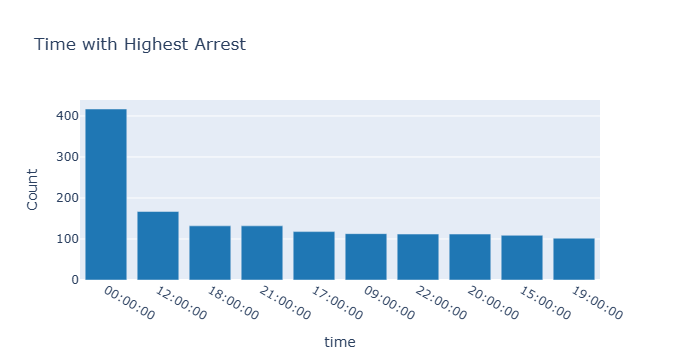

In [196]:
# Chart: Bar plot (top times for clarity)
top_times = time_counts.head(10)
fig = px.bar(top_times, x='time', y='Count', title='Time with Highest Arrest',
    color_discrete_sequence=['#1f77b4',])
fig.show()

### Question 6: Which month and year has the highest and lowest arrests?

In [199]:
# Get month-year combination
p_arrest['Month_Year'] = p_arrest['Event_Time'].dt.to_period('M').astype(str)

# Group and count arrests per month year
month_year_counts = p_arrest['Month_Year'].value_counts().reset_index()
month_year_counts.columns = ['Month_Year', 'Count']

In [201]:
# Find highest and lowest month-year arrests
Highest = month_year_counts.loc[month_year_counts['Count'].idxmax()]
Lowest = month_year_counts.loc[month_year_counts['Count'].idxmin()]

print("Highest Arrests:")
print(Highest)

print("\nLowest Arrests:")
print(Lowest)


Highest Arrests:
Month_Year    2023-08
Count             665
Name: 0, dtype: object

Lowest Arrests:
Month_Year    2024-11
Count             110
Name: 47, dtype: object


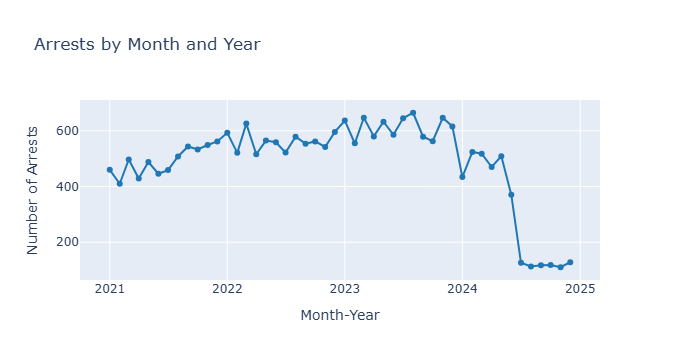

In [202]:
fig = px.line(month_year_counts.sort_values('Month_Year'),
              x='Month_Year',
              y='Count',
              title='Arrests by Month and Year',
              markers=True,
              color_discrete_sequence=['#1f77b4'])
fig.update_layout(xaxis_title='Month-Year', yaxis_title='Number of Arrests')

fig.show()